#**Linear Regression**

Author : Prathamesh Joshi <br>



#So what is Linear regression ? 

Regression models are used to predict a continuous value.It is a supervised learning technique.<br>

*****************************************************************

**Linear regression** - *is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x)*.<br>

*****************************************************************

**Polynomial regression** - *is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding y*<br>

*****************************************************************

**Some applications of Simple Linear Regression include :** <br>
1) Predicting crop yields based on amount of rainfall : Yield is dependent variable while amount of rainfall is independent variable.<br>
2) Marks scored by student based on number of hours studied (ideally) : Here marks scored is dependent and number of hours studied is independent.<br>
3) Predicting the Salary of a person based on years of experience : Thus Experience become the independent variable while Salary becomes the dependent variable.

*****************************************************************

**Ridge Regression**<br>
*A standard linear or polynomial regression will fail in the case where there is high collinearity among the feature variables. Collinearity is the existence of near-linear relationships among the independent variables. The presence of hight collinearity can be determined in a few different ways:* <br>
Ridge Regression adds a small squared bias factor to the variables:<br>

min || Xw — y ||² + z|| w ||²

*****************************************************************

**Lasso Regression -**<br> is quite similar to Ridge Regression in that both techniques have the same premise. We are again adding a biasing term to the regression optimization function in order to reduce the effect of collinearity and thus the model variance. However, instead of using a squared bias like ridge regression, lasso instead using an absolute value bias: <br>

min || Xw — y ||² + z|| w ||

# Linear Regression

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Dataset link - https://www.kaggle.com/rsadiq/salary  ( note you may download it and upload the file on colab) /  or just follow this colab to use api to call the dataset  ) - this method can be useful when dataset is very large in size and it will save the time to download and upload !!


In [0]:
#  !! api we will use to download the dataset - kaggle datasets download -d rsadiq/salary

#Note
*you just need a kaggle.json file in your system which is to be uploaded in files folder in colab .. and here we go*

In [0]:
!pip install -q kaggle

In [0]:
! mkdir ~/.kaggle # make directory named kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! cp kaggle.json ~/.kaggle/  # copy kaggle.json file there.

In [0]:
! chmod 600 ~/.kaggle/kaggle.json #Change the permissions of the file.

In [0]:
! kaggle datasets download -d rsadiq/salary # api mentioned before used after this you can see salary.zip file

salary.zip: Skipping, found more recently modified local copy (use --force to force download)


*# now unzip the file*

In [0]:
!mkdir Salary_data

mkdir: cannot create directory ‘Salary_data’: File exists


In [0]:
!unzip salary.zip -d Salary_data

Archive:  salary.zip
replace Salary_data/Salary.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Salary_data/Salary.csv  


# Data Preprocessing

In [0]:
df=pd.read_csv("/content/Salary_data/Salary.csv") # in the Salary_data folder copy the path of file n paste here
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# visualization of data 

Text(0, 0.5, 'Salary')

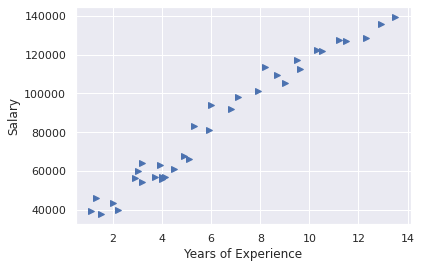

In [0]:
plt.plot(df[['YearsExperience']],df[['Salary']],'>')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")

In [0]:
X=df[['YearsExperience']] # independent variable or attribute in X 
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [0]:
y=df[['Salary']] # dependent variable or attribut in y 
y.head()

,Salary
0,39343
1,46205
2,37731
3,43525
4,39891


# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model=LinearRegression()

In [0]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_pred=model.predict(X)

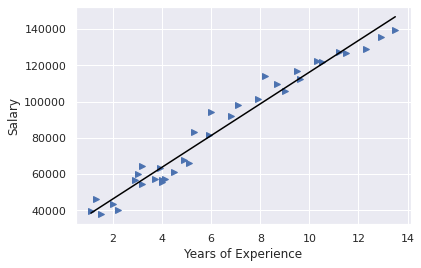

In [0]:
plt.plot(df[['YearsExperience']],df[['Salary']],'>')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.plot(X,y_pred,c='black')

# Testing the model on say x = 10 or x = 12, see the above graph just to visualize if our predicted result approx

In [0]:
model.predict([[10]])

array([[116178.93666516]])

# Polynomial Regression

Dataset Link: https://www.kaggle.com/rahulsah06/salary-prediction-based-on-position-and-experience

In [0]:
!mkdir Position_Salary

In [0]:
! kaggle datasets download -d rahulsah06/salary-prediction-based-on-position-and-experience

  0% 0.00/399 [00:00<?, ?B/s]
100% 399/399 [00:00<00:00, 671kB/s]


In [0]:
!unzip salary-prediction-based-on-position-and-experience.zip -d Position_Salary

Archive:  salary-prediction-based-on-position-and-experience.zip
  inflating: Position_Salary/Salary Prediction based on Position and Experience.csv  


In [0]:
df=pd.read_csv("/content/Position_Salary/Salary Prediction based on Position and Experience.csv")

In [0]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [0]:
df.shape

(10, 3)

In [0]:
X=df[['Level']]
X.head()

,Level
0,1
1,2
2,3
3,4
4,5


In [0]:
Y=df[['Salary']]
Y.head()

,Salary
0,45000
1,50000
2,60000
3,80000
4,110000


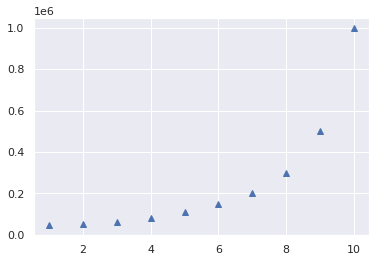

In [0]:
plt.plot(X,Y,'^')

# Adding Polynomial Features to X

In [0]:
from sklearn.preprocessing import PolynomialFeatures

In [0]:
p=PolynomialFeatures(degree=5)
p.fit(X)
X_poly=p.transform(X)

In [0]:
X_poly

array([[1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00],
       [1.0000e+00, 2.0000e+00, 4.0000e+00, 8.0000e+00, 1.6000e+01,
        3.2000e+01],
       [1.0000e+00, 3.0000e+00, 9.0000e+00, 2.7000e+01, 8.1000e+01,
        2.4300e+02],
       [1.0000e+00, 4.0000e+00, 1.6000e+01, 6.4000e+01, 2.5600e+02,
        1.0240e+03],
       [1.0000e+00, 5.0000e+00, 2.5000e+01, 1.2500e+02, 6.2500e+02,
        3.1250e+03],
       [1.0000e+00, 6.0000e+00, 3.6000e+01, 2.1600e+02, 1.2960e+03,
        7.7760e+03],
       [1.0000e+00, 7.0000e+00, 4.9000e+01, 3.4300e+02, 2.4010e+03,
        1.6807e+04],
       [1.0000e+00, 8.0000e+00, 6.4000e+01, 5.1200e+02, 4.0960e+03,
        3.2768e+04],
       [1.0000e+00, 9.0000e+00, 8.1000e+01, 7.2900e+02, 6.5610e+03,
        5.9049e+04],
       [1.0000e+00, 1.0000e+01, 1.0000e+02, 1.0000e+03, 1.0000e+04,
        1.0000e+05]])

# Ridge Regression (regularization)

In [0]:
from sklearn.linear_model import Ridge

In [0]:
model2=Ridge(alpha=1000000)
model2.fit(X_poly,Y)

Ridge(alpha=1000000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [0]:
y_poly=model2.predict(X_poly)

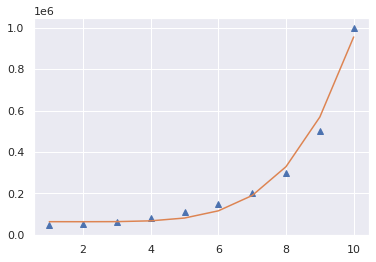

In [0]:
plt.plot(X,Y,'^')
plt.plot(X,y_poly)

# Lasso Regression (regularization)

In [0]:
from sklearn.linear_model import Lasso

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3291450468.6775227, tolerance: 80662250.0
  positive)


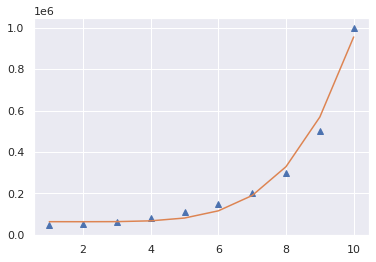

In [0]:
model3=Lasso(alpha=10000)
model3.fit(X_poly,Y)
y_poly2=model2.predict(X_poly)
plt.plot(X,Y,'^')
plt.plot(X,y_poly2)